<a href="https://colab.research.google.com/github/stemike/mimic-lstm/blob/master/Colab_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
import json
import os

import numpy as np

from google.colab.patches import cv2_imshow
from glob import glob

In [3]:
# constants
drive_path = '/content/drive/My Drive'
user_path = '/JKU/CV'
project_path = '/CV_Project/Dataset/data_WiSAR/data/'
impath = drive_path + user_path + project_path

data_folders = ['train/', 'validation/', 'test/']
mask_path = impath + 'mask.png'
homography_name = 'homographies.json'
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) # Greyscale mask

In [4]:
# Get an overview of the amount of data
for data_folder in data_folders:
  samples = glob(f'{impath + data_folder}/*/')
  print(f'{len(samples)} samples in {data_folder}')
  foo = [len(glob(f'{sample}/*.png')) for sample in samples]
  print(f'Average of {np.mean(foo)} images with std of {np.std(foo)} per sample in {data_folder}')

26 samples in train/
Average of 70.0 images with std of 0.0 per sample in train/
11 samples in validation/
Average of 70.0 images with std of 0.0 per sample in validation/
13 samples in test/
Average of 70.0 images with std of 0.0 per sample in test/


/content/drive/My Drive/JKU/CV/CV_Project/Dataset/data_WiSAR/data/train/train-1-12/
(1024, 1024, 3)
(1024, 1024, 3)


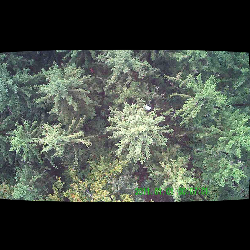

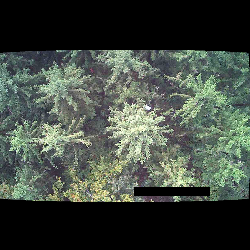

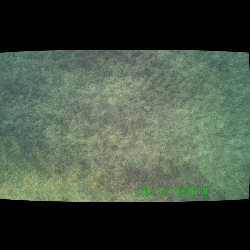

{'0-B01': [[0.9993195013803251, -0.005571103072643948, 3.8723127295338773], [0.004929308722371987, 0.9998408586944214, -2.0925586367525475], [-9.924148696158862e-07, -4.068866093337941e-07, 1.0009775178889595]], '1-B01': [[0.9995305476059302, -0.003824083028379826, 2.884926221160355], [0.0030294634670115094, 0.9997084550327814, -0.8607880736699798], [-6.909746540828073e-07, -8.031877391685788e-07, 1.000937390377664]], '2-B01': [[0.999559101037177, -0.002864500922555533, 2.395863305460522], [0.0018493841952289894, 0.9995850331002011, 1.195884922570122], [-6.53311931449075e-07, -1.1555920774828547e-06, 1.0010149827361825]], '3-B01': [[0.9999999992271926, 1.3058802459607982e-10, 2.2871337080914388e-07], [-6.487745195709042e-11, 0.9999999995885731, 5.567162067868735e-07], [-5.102089825174925e-14, 2.643775518659545e-13, 0.9999999996896354]], '4-B01': [[1.0002168198047323, -4.850484650626181e-05, -0.820443550789323], [-0.0006655293661614075, 0.9995582915822318, 1.7658575983171096], [3.236084

In [25]:
sample = glob(f'{impath + data_folders[0]}/*/')[0]
image_paths = glob(f'{sample}/0*.png')
homography_path = f'{sample}{homography_name}'


print(sample)

images = [cv2.imread(f) for f in image_paths]

print(np.mean(images, axis=0).shape)

image = cv2.imread(image_paths[0])
print(image.shape)
masked_image = cv2.bitwise_and(image, image, mask = mask)
cv2_imshow(cv2.resize(image, (250, 250)))
cv2_imshow(cv2.resize(masked_image, (250, 250)))
cv2_imshow(cv2.resize(np.mean(images, axis=0), (250, 250)))

with open(f'{sample}{homography_name}', 'r') as f:
  homographies = json.load(f)
  print(homographies)
homography = np.array(homographies)